
## **BIG DATA ANALYTICS IN CLOUD PROJECT**

### **TABLE OF CONTENTS**

1. Introduction
2. Background and Motivation
3. Package installed
4. First look on the data
5. Exploratory data analysis
6. Feature correlation to target
7. Fixing correlation to target
8. Fixing the dataset (missing values and imbalanced target)
9. Modeling

**1. INTRODUCTION**

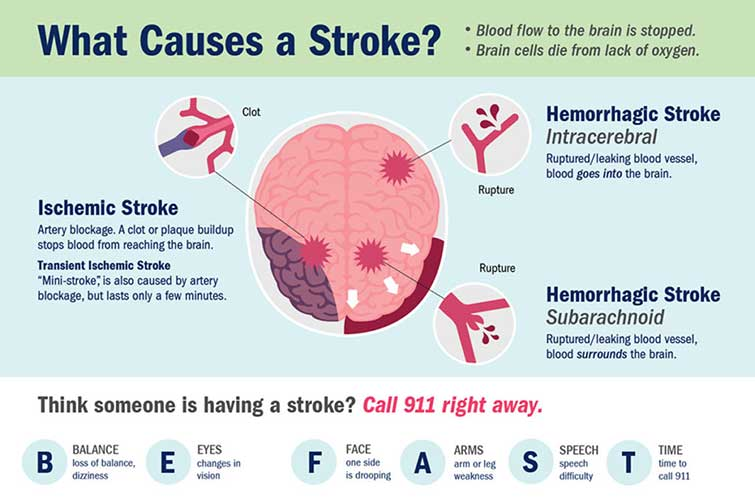

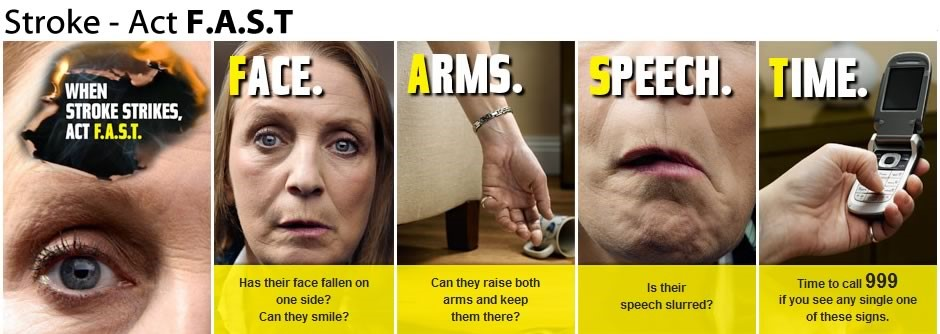

In [216]:
from IPython.display import Image, display
display(Image('/content/types.jpg'))
display(Image('/content/Symptoms.jpg'))

**BACKGROUND AND MOTIVATION**

- Background: **A stroke occurs when the blood supply to part of your brain is interrupted or reduced, preventing brain tissue from getting oxygen and nutrients. Brain cells begin to die in minutes.**
  **A stroke is a medical emergency, and prompt treatment is crucial. Early action can reduce brain damage and other complications.**
    **The good news is that many fewer Indians die of stroke now than in the past. Effective treatments can also help prevent disability from stroke.**

- Motivation : **Our objective is to understand what are the reasons that cause stroke to peoeple and see if we can succefully detect stroke on some features using ML technics**

**Installing packages**

In [217]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Loading the data**

In [218]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [219]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


(5110, 12)

In [220]:
# Exploring the datatypes
data.dtypes.value_counts()

,count
object,5
int64,4
float64,3


In [221]:
data = data.drop(columns=["id"], axis=1)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [222]:
data.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201
smoking_status,0


In [223]:
# Finding which column has null values
data.dropna(inplace=True)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


##  As a general thumb rule, tolerate up to 5% of missing data before considering deletion. This should only be done when dataset is huge.

There are 201 null values in bmi column.
all those NaN value containing rows were deleted.

Reason: we do not want noise in the data.

This is medical dataset so we can't accept error in the model.
BMI is given for varied persons age ranging between 8 month old baby to 84 year old adult. So taking mean/median or even KNN imputation will give errorneous data, which will be unacceptable.

In [224]:
data.shape

(4909, 11)

In [225]:
import plotly.express as px
fig = px.pie(data, names='stroke', title='Stroke Distribution')
fig.show()

From Fig: (Dependent variable : stroke= 0 if not, 1 if there is possibility of stroke). This is an imbalanced dataset as 95.7% is predicting no stroke whereas only 4.26% is predicting stroke possibility.

# **Exploratory Data Analysis (EDA)**

In [226]:
def plot_hist(col, bins=30, title="",xlabel="",ax=None):
    sns.distplot(col, bins=bins,ax=ax)
    ax.set_title(f'Histogram of {title}',fontsize=20)
    ax.set_xlabel(xlabel)

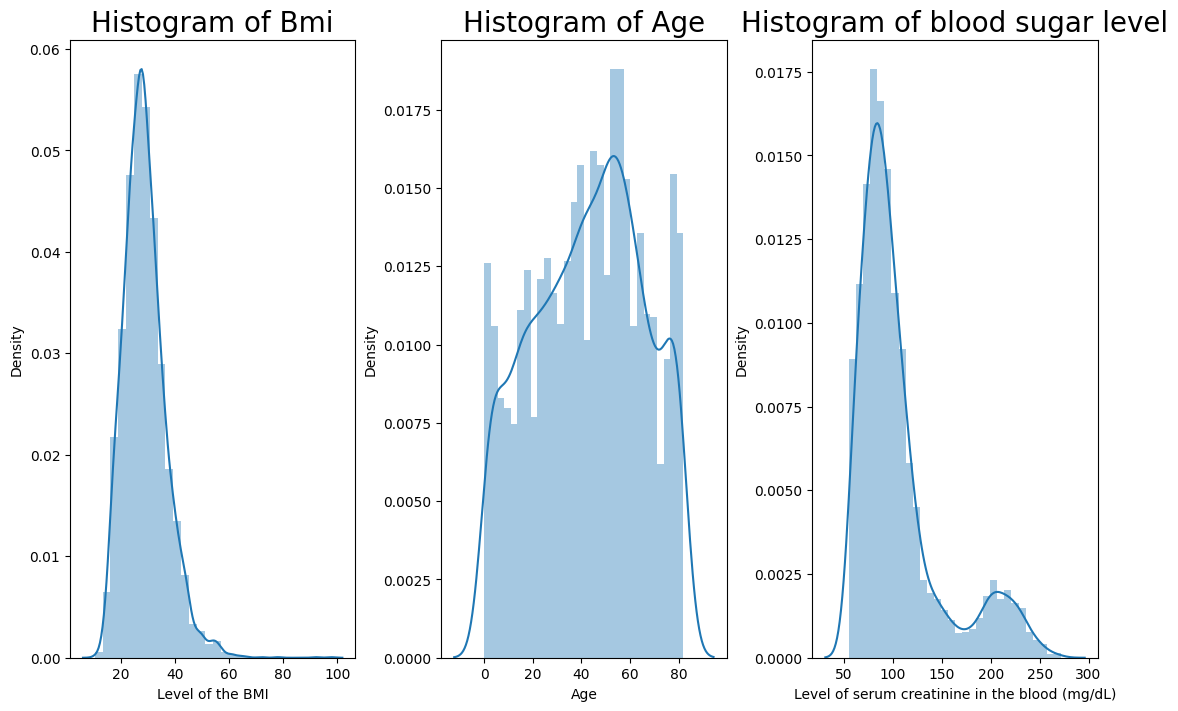

In [227]:
fig, axes = plt.subplots(1,3,figsize=(11,7),constrained_layout=True)
plot_hist(data.bmi,
          title='Bmi',
          xlabel="Level of the BMI",
          ax=axes[0])
plot_hist(data.age,
          bins=30,
          title='Age',
          xlabel='Age',
          ax=axes[1])
plot_hist(data.avg_glucose_level,
          title='blood sugar level',
          xlabel='Level of serum creatinine in the blood (mg/dL)',
          ax=axes[2])

plt.show()

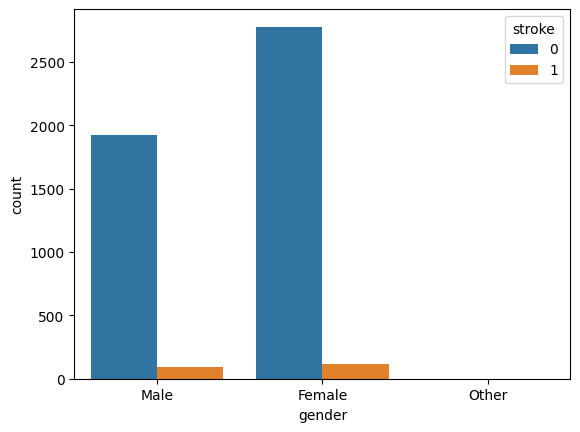

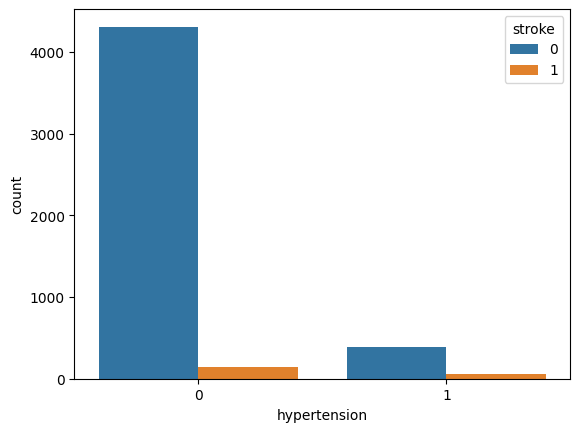

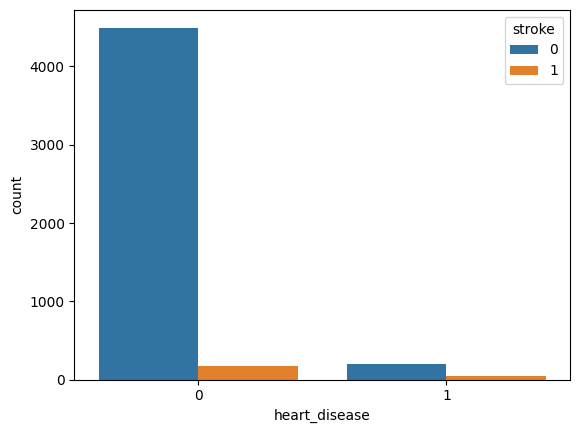

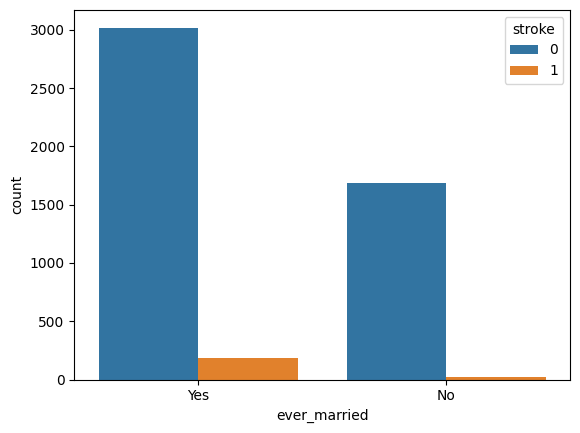

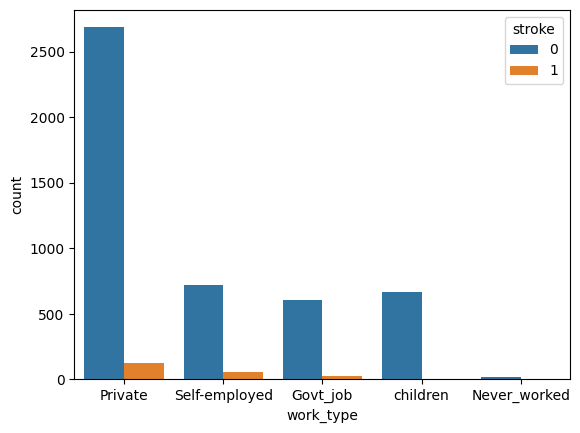

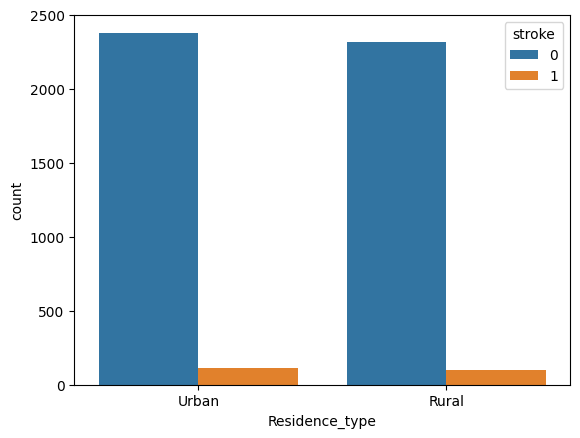

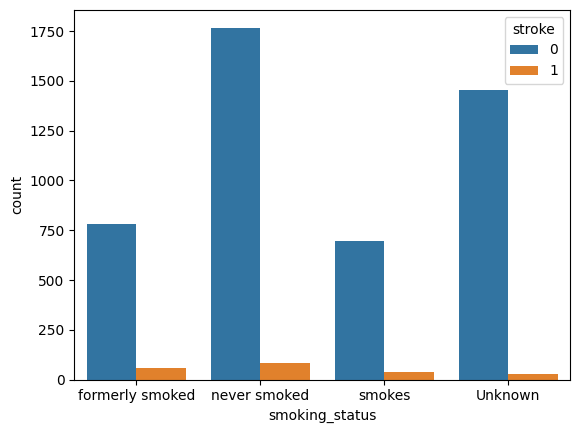

In [228]:
sns.countplot(x='gender', hue='stroke', data=data)
plt.show()
sns.countplot(x='hypertension', hue='stroke', data=data)
plt.show()
sns.countplot(x='heart_disease', hue='stroke', data=data)
plt.show()
sns.countplot(x='ever_married', hue='stroke', data=data)
plt.show()
sns.countplot(x='work_type', hue='stroke', data=data)
plt.show()
sns.countplot(x='Residence_type', hue='stroke', data=data)
plt.show()
sns.countplot(x='smoking_status', hue='stroke', data=data)
plt.show()


In [229]:
len_data = len(data)
len_w = len(data[data["gender"]=="Male"])
len_m = len_data - len_w

men_stroke = len(data.loc[(data["stroke"]==1)&(data['gender']=="Male")])
men_no_stroke = len_m - men_stroke

women_stroke = len(data.loc[(data["stroke"]==1) & (data['gender']=="Female")])
women_no_stroke = len_w - women_stroke

labels = ['Men with stroke','Men healthy','Women with stroke','Women healthy']
values = [men_stroke, men_no_stroke, women_stroke, women_no_stroke]

import plotly.graph_objects as go
fig = go.Figure(data=[go.Pie(labels=labels, values=values,textinfo='label+percent',hole=0.4)])
fig.update_layout(
    title_text="Distribution of stroke EVENT according to their gender")
fig.show()

In [230]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

### **Nominal data : One-Hot Encoding**
  ### **Ordinal data: Label Encoding**

In [231]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
data['gender'] = labelencoder.fit_transform(data['gender'])
data['ever_married'] = labelencoder.fit_transform(data['ever_married'])
data['work_type'] = labelencoder.fit_transform(data['work_type'])
data['Residence_type'] = labelencoder.fit_transform(data['Residence_type'])
data['smoking_status'] = labelencoder.fit_transform(data['smoking_status'])
data.head()
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,0,4,0,103.08,18.6,0,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,1,0


In [232]:
x = data.iloc[:,0:10].values
x
x.shape
y = data.iloc[:,10].values
y

array([1, 1, 1, ..., 0, 0, 0])

In [233]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer([
    ("gender",OneHotEncoder(),[0]),
    ("work_type",OneHotEncoder(),[5]),
    ("smoking_status",OneHotEncoder(),[9])
], remainder = 'passthrough')

In [234]:
x = ct.fit_transform(x)
x

array([[  0.  ,   1.  ,   0.  , ...,   1.  , 228.69,  36.6 ],
       [  0.  ,   1.  ,   0.  , ...,   0.  , 105.92,  32.5 ],
       [  1.  ,   0.  ,   0.  , ...,   1.  , 171.23,  34.4 ],
       ...,
       [  1.  ,   0.  ,   0.  , ...,   0.  ,  82.99,  30.6 ],
       [  0.  ,   1.  ,   0.  , ...,   0.  , 166.29,  25.6 ],
       [  1.  ,   0.  ,   0.  , ...,   1.  ,  85.28,  26.2 ]])

In [235]:
x.shape

(4909, 19)

In [236]:
x = pd.DataFrame(x)
x.columns = ['gender_female','gender_male','gender_other','work_type_govt','work_type_neverworked','work_type_private','work_type_selfemployed','work_type_children','smoking_status_unknown','smoking_status_formerlysmoked','smoking_status_neversmoked','smoking_status_smokes','age','hypertension','heart_disease','ever_married','Residence_type','avg_glucose_level','bmi']
x

,gender_female,gender_male,gender_other,work_type_govt,work_type_neverworked,work_type_private,work_type_selfemployed,work_type_children,smoking_status_unknown,smoking_status_formerlysmoked,smoking_status_neversmoked,smoking_status_smokes,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,67.0,0.0,1.0,1.0,1.0,228.69,36.6
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,80.0,0.0,1.0,1.0,0.0,105.92,32.5
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,49.0,0.0,0.0,1.0,1.0,171.23,34.4
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,79.0,1.0,0.0,1.0,0.0,174.12,24.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,81.0,0.0,0.0,1.0,1.0,186.21,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4904,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,103.08,18.6
4905,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,81.0,0.0,0.0,1.0,1.0,125.20,40.0
4906,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,35.0,0.0,0.0,1.0,0.0,82.99,30.6
4907,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,51.0,0.0,0.0,1.0,0.0,166.29,25.6


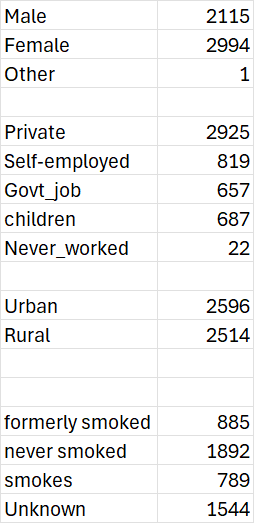

In [237]:
x = x.drop(["gender_other","work_type_neverworked","smoking_status_unknown"], axis=1)
x

,gender_female,gender_male,work_type_govt,work_type_private,work_type_selfemployed,work_type_children,smoking_status_formerlysmoked,smoking_status_neversmoked,smoking_status_smokes,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,67.0,0.0,1.0,1.0,1.0,228.69,36.6
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,80.0,0.0,1.0,1.0,0.0,105.92,32.5
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,49.0,0.0,0.0,1.0,1.0,171.23,34.4
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,79.0,1.0,0.0,1.0,0.0,174.12,24.0
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,81.0,0.0,0.0,1.0,1.0,186.21,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4904,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,103.08,18.6
4905,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,81.0,0.0,0.0,1.0,1.0,125.20,40.0
4906,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35.0,0.0,0.0,1.0,0.0,82.99,30.6
4907,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,51.0,0.0,0.0,1.0,0.0,166.29,25.6


In [238]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# **Feature Correlation to Target**

In [239]:
fig = px.parallel_categories(data[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type',
       'smoking_status', 'stroke']], color='stroke', color_continuous_scale=px.colors.sequential.Inferno)
fig.show()



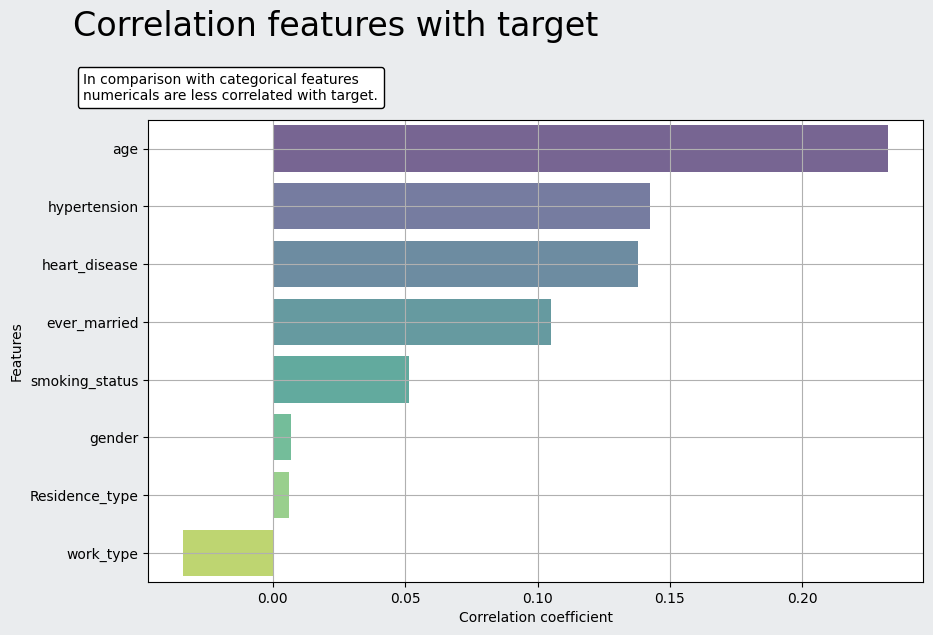

In [240]:
features=['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type',
       'smoking_status']
from matplotlib.offsetbox import AnchoredText
correlation_table = []
for cols in features:
    y = data["stroke"]
    x = data[cols]
    corr = np.corrcoef(x, y)[1][0]
    dict ={
        'Features': cols,
        'Correlation coefficient' : corr,
        'Feat_type': 'numerical'
    }
    correlation_table.append(dict)
dF1 = pd.DataFrame(correlation_table)
fig = plt.figure(figsize=(10,6), facecolor='#EAECEE')
ax = sns.barplot(x="Correlation coefficient", y="Features",
                     data=dF1.sort_values("Correlation coefficient", ascending=False),
                     palette='viridis', alpha=0.75)
ax.grid()
#ax.set_title("Correlation of numerical features with Target", fontsize=20, y=1.05)

title =  'Correlation features with target'
sub_title = 'In comparison with categorical features \
\nnumericals are less correlated with target.'

plt.gcf().text(0.05, 1.02, title, fontsize=24)
#plt.gcf().text(0.05, 0.9, sub_title, fontsize=14)

at1 = AnchoredText(sub_title,
                   loc='lower left', frameon=True,
                   bbox_to_anchor=(-0.1, 1.01),
                   bbox_transform=ax.transAxes,
                   #prop=dict(size=8),
                   )
at1.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax.add_artist(at1)

In [241]:
from sklearn.ensemble import ExtraTreesClassifier

X = data[features]
y = data['stroke']
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=23)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]


In [242]:
print("Feature ranking:")

for f in range(X.shape[1]):
  print("%d. feature %d (%s) = %f" % (f + 1, indices[f], features[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature 1 (age) = 0.671059
2. feature 7 (smoking_status) = 0.101616
3. feature 5 (work_type) = 0.070610
4. feature 6 (Residence_type) = 0.035813
5. feature 2 (hypertension) = 0.034149
6. feature 0 (gender) = 0.032084
7. feature 3 (heart_disease) = 0.032036
8. feature 4 (ever_married) = 0.022633


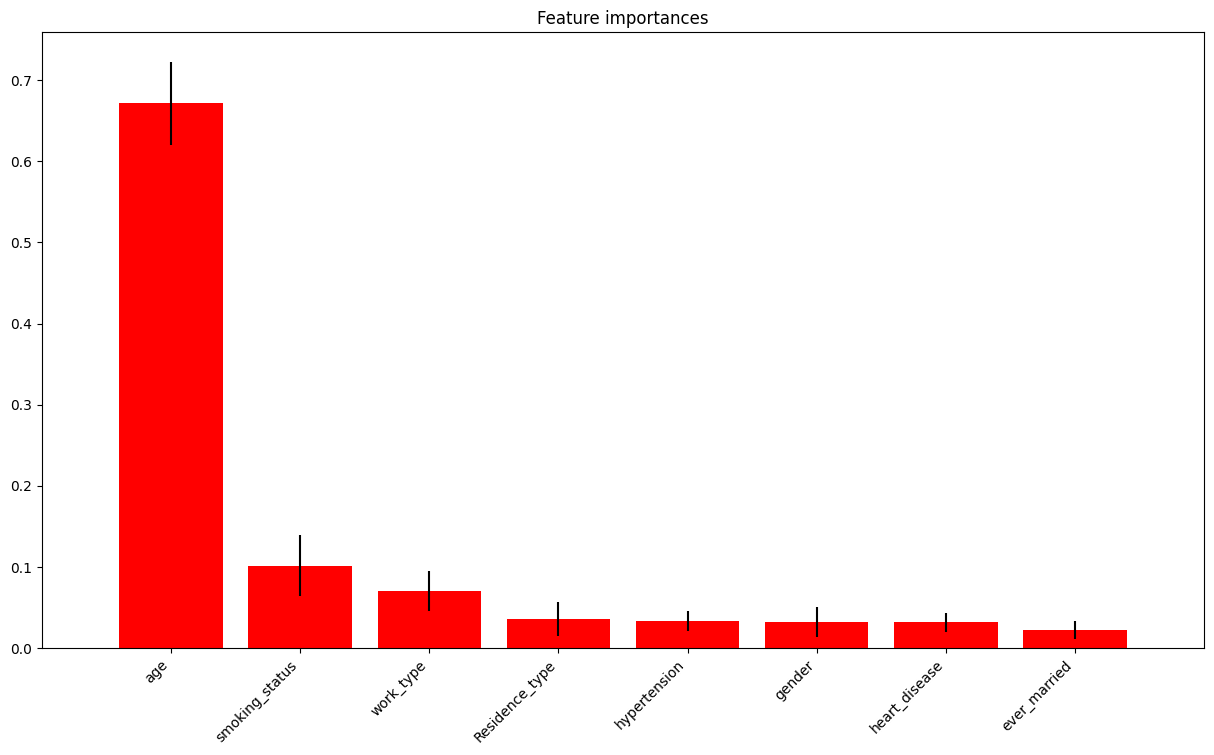

In [243]:
plt.figure(figsize=(15, 8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=45, ha='right')
plt.xlim([-1, X.shape[1]])
plt.show()

In [244]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

<Axes: >

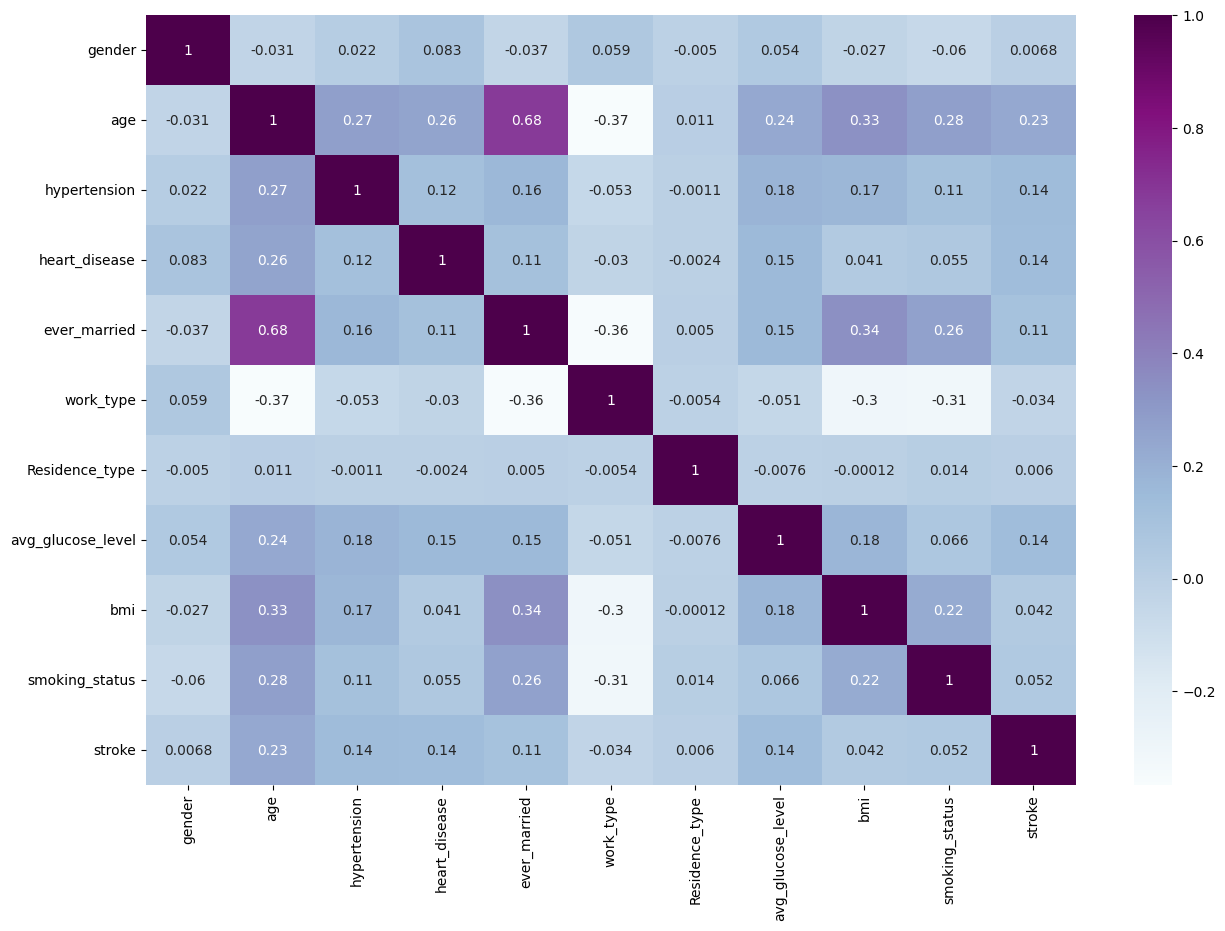

In [245]:
corr = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")


In [246]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=23)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [247]:
## Logistic Regression ML Model
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
classifier = LogisticRegression(random_state = 23)

# Train the model on the SMOTE-resampled data
classifier.fit(x_train_smote, y_train_smote)

LogisticRegression(random_state=23)

Accuracy: 0.7128309572301426


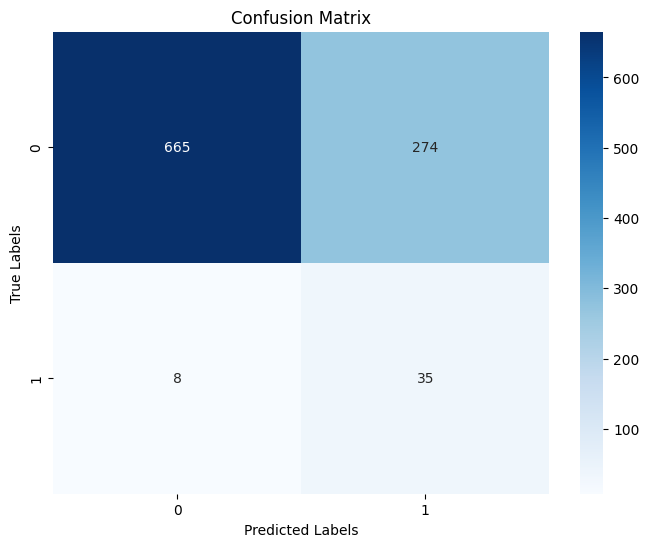

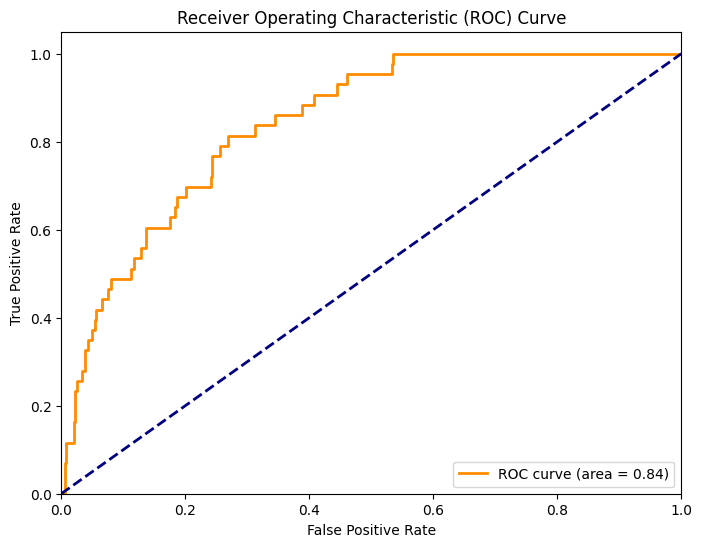

In [248]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

# Predicting the Test set results
y_pred = classifier.predict(x_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for the positive class
y_pred_proba = classifier.predict_proba(x_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

KNN Accuracy: 0.8706720977596741


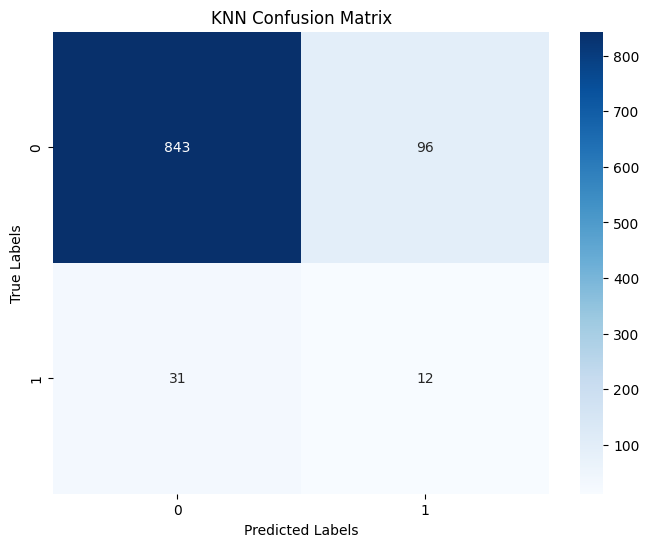

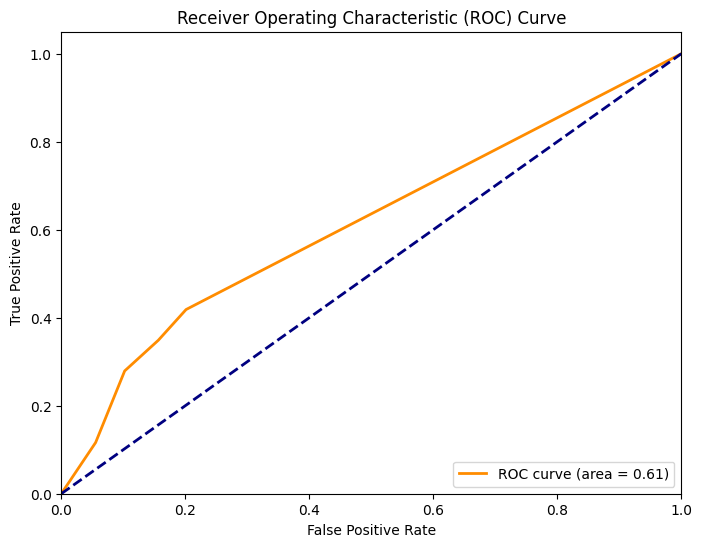

In [249]:
# KNN ML Model

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Create a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=4)  # You can adjust the number of neighbors

# Train the model
knn_classifier.fit(x_train_smote, y_train_smote)

# Predict on the test set
y_pred_knn = knn_classifier.predict(x_test)

# Evaluate the model
cm_knn = confusion_matrix(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues")
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# Create roc curve

import matplotlib.pyplot as plt
# Get the predicted probabilities for the positive class
y_pred_proba = knn_classifier.predict_proba(x_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Decision Tree Accuracy: 0.8594704684317719


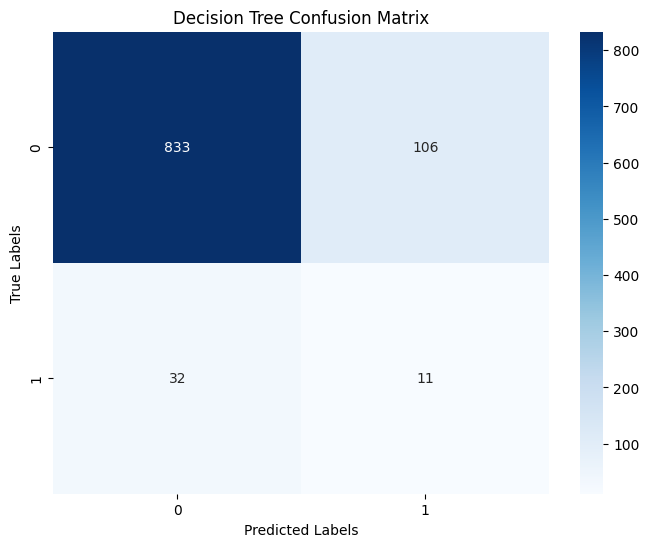

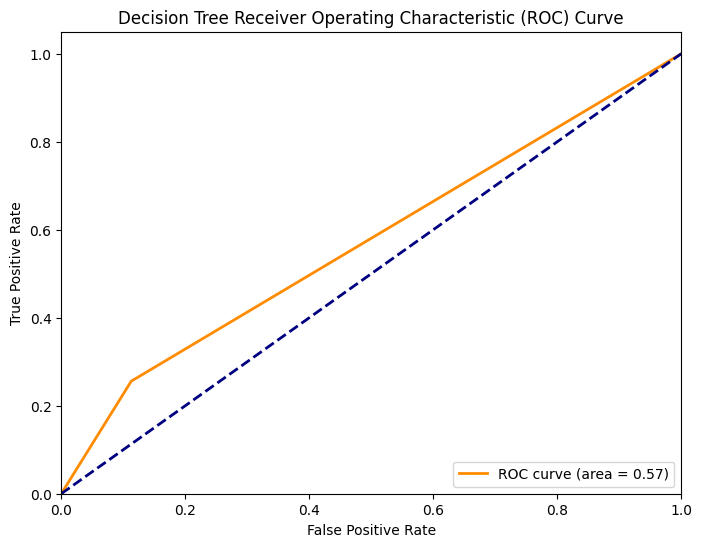

In [250]:
# Decision Tree ML Model

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=23)

# Train the model on the SMOTE-resampled data
dt_classifier.fit(x_train_smote, y_train_smote)

# Predict on the test set
y_pred_dt = dt_classifier.predict(x_test)

# Evaluate the model
cm_dt = confusion_matrix(y_test, y_pred_dt)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues")
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# create roc curve for decion tree

import matplotlib.pyplot as plt
# Get the predicted probabilities for the positive class
y_pred_proba = dt_classifier.predict_proba(x_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Random Forest Accuracy: 0.9195519348268839


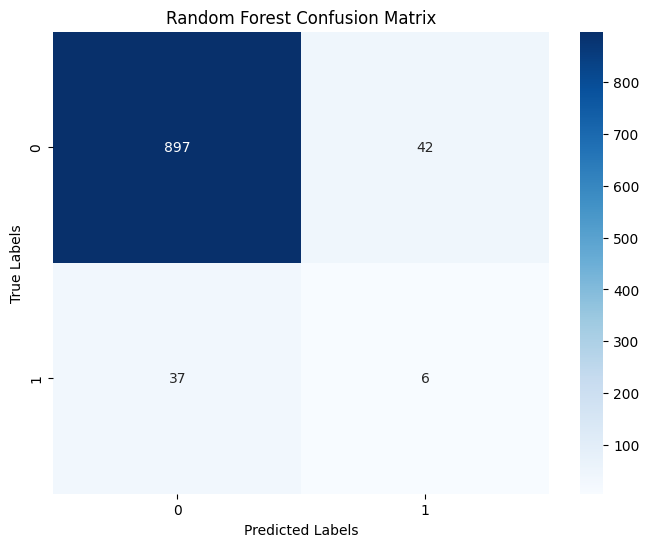

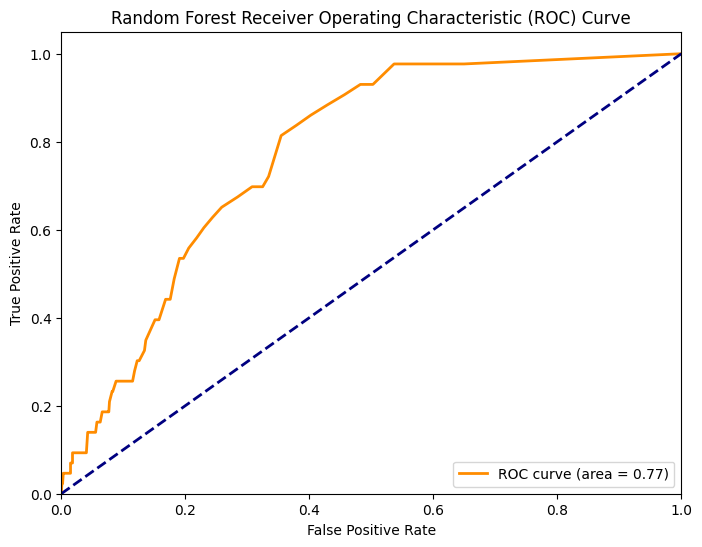

In [251]:
# Random forest classifier ML Model

import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=23)  # You can adjust the number of estimators

# Train the model on the SMOTE-resampled data
rf_classifier.fit(x_train_smote, y_train_smote)

# Predict on the test set
y_pred_rf = rf_classifier.predict(x_test)

# Evaluate the model
cm_rf = confusion_matrix(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# Get the predicted probabilities for the positive class
y_pred_proba = rf_classifier.predict_proba(x_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


XGBoost Accuracy: 0.9256619144602851


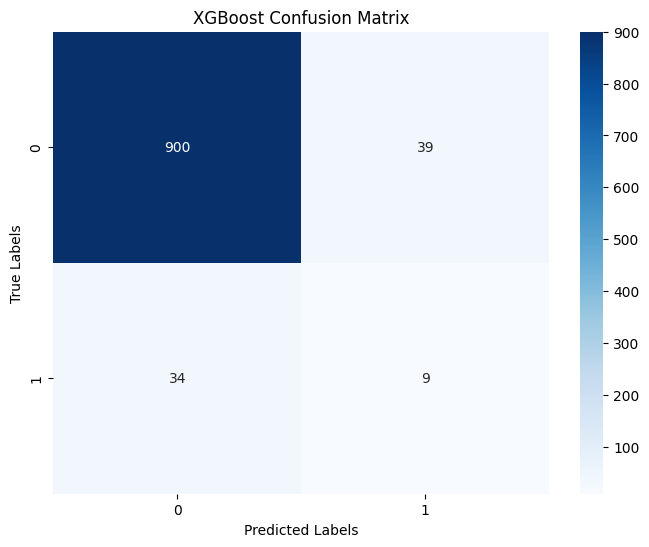

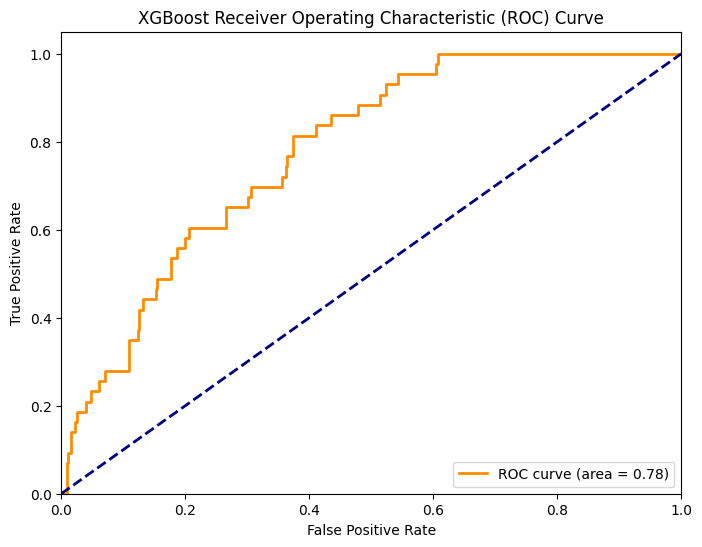

In [252]:
# XG Boost ML Model

import matplotlib.pyplot as plt
!pip install xgboost
from xgboost import XGBClassifier

# Create an XGBoost classifier
xgb_classifier = XGBClassifier(random_state=23)

# Train the model on the SMOTE-resampled data
xgb_classifier.fit(x_train_smote, y_train_smote)

# Predict on the test set
y_pred_xgb = xgb_classifier.predict(x_test)

# Evaluate the model
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues")
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# Get the predicted probabilities for the positive class
y_pred_proba = xgb_classifier.predict_proba(x_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


SVM Accuracy: 0.8044806517311609


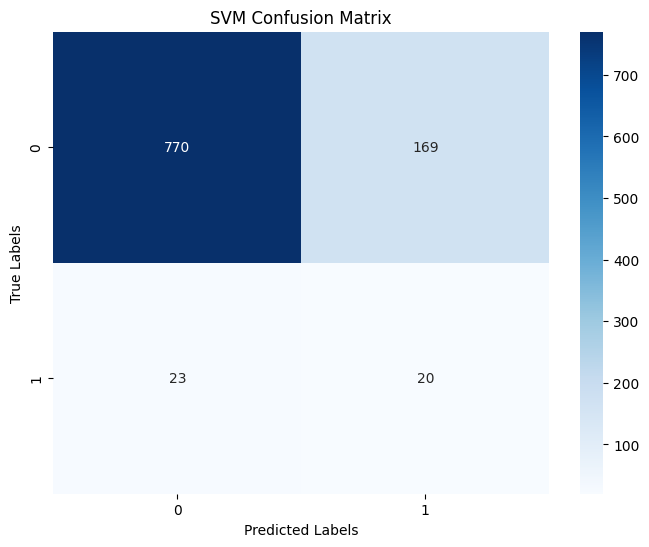

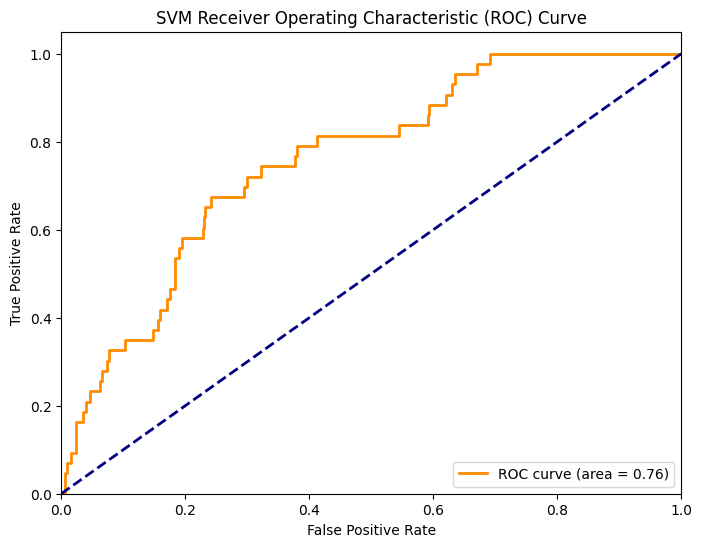

In [253]:
# SVM ML Model

import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', random_state=23, probability=True)  # Radial Basis Function

# Train the model on the SMOTE-resampled data
svm_classifier.fit(x_train_smote, y_train_smote)

# Predict on the test set
y_pred_svm = svm_classifier.predict(x_test)

# Evaluate the model
cm_svm = confusion_matrix(y_test, y_pred_svm)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues")
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# Get the predicted probabilities for the positive class
y_pred_proba = svm_classifier.predict_proba(x_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


AdaBoost Accuracy: 0.814663951120163


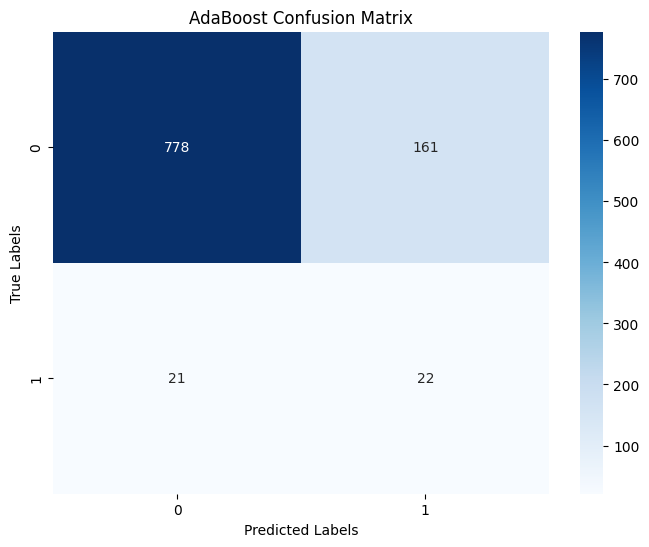

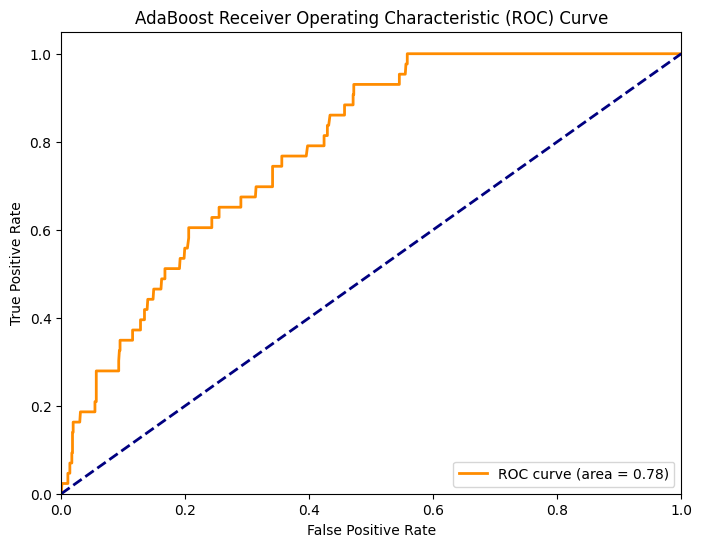

In [254]:
# Adaboost ML Model

import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier

# Create an AdaBoost classifier
ada_classifier = AdaBoostClassifier(n_estimators=100, random_state=23)  # You can adjust the number of estimators

# Train the model on the SMOTE-resampled data
ada_classifier.fit(x_train_smote, y_train_smote)

# Predict on the test set
y_pred_ada = ada_classifier.predict(x_test)

# Evaluate the model
cm_ada = confusion_matrix(y_test, y_pred_ada)
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print("AdaBoost Accuracy:", accuracy_ada)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ada, annot=True, fmt="d", cmap="Blues")
plt.title('AdaBoost Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# Get the predicted probabilities for the positive class
y_pred_proba = ada_classifier.predict_proba(x_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoost Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [255]:
import plotly.graph_objects as go

models = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'SVM', 'AdaBoost']

# Create a list of corresponding accuracies
accuracies = [accuracy, accuracy_knn, accuracy_dt, accuracy_rf, accuracy_xgb, accuracy_svm, accuracy_ada]

# Create the bar chart
fig = go.Figure(data=[go.Bar(x=models, y=accuracies)])

# Customize the layout
fig.update_layout(
    title="Model Accuracy Comparison",
    xaxis_title="Models",
    yaxis_title="Accuracy",
    barmode='group'
)

# Show the chart
fig.show()

In [256]:
# Create a DataFrame with model names and accuracies
model_df = pd.DataFrame({
    '**Model**': ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'SVM', 'AdaBoost'],
    '**Accuracy**': [accuracy, accuracy_knn, accuracy_dt, accuracy_rf, accuracy_xgb, accuracy_svm, accuracy_ada]
})

# Display the table
print(model_df)

             **Model**  **Accuracy**
0  Logistic Regression      0.712831
1                  KNN      0.870672
2        Decision Tree      0.859470
3        Random Forest      0.919552
4              XGBoost      0.925662
5                  SVM      0.804481
6             AdaBoost      0.814664


**Conclusion:**

1.   The top-performing models are XGBoost and Random Forest, with accuracy scores of 0.925662 and 0.919552, respectively. These models are likely capturing complex patterns in the data that are indicative of stroke risk.

2.  The Decision Tree and KNN models also perform reasonably well, with accuracy scores above 0.85.

3.  On the other hand, the Logistic Regression and SVM models have lower accuracy scores, suggesting that they may not be capturing the underlying relationships in the data as effectively.

## **Further what can be done**

**Validation and Refinement:**

Test and refine the model to ensure its accuracy and reliability in various clinical settings.

**Implementation:**

Integrate the predictive model into healthcare systems to assist providers in identifying at-risk individuals and implementing preventive measures.

**Model Deployment:**

Deploy the predictive model into a production environment where it can be accessed and used by end-users through the web application. Setting up the model deployment infrastructure on cloud platforms such as AWS, Azure, or Google Cloud. Integrating the trained model with the Streamlit app and ensure that it runs efficiently in the deployment environment.

**Implementation and Integration:**

Integrate the app with existing healthcare systems and electronic health records (EHRs) to enhance its utility and support clinical decision-making.
